In [7]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
%matplotlib inline

In [8]:
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/isone/boston_train_data_covid_42days_component.csv', parse_dates=['date'])

In [9]:
df.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,LocalLinearTrend,Weekly,Dynamic,full_time_coefficients,completely_coefficients,Retail_coefficients
0,1,2019-01-01,58938.0,8.313750,998,17243,22087,33034,55121,60094.563122,1088.585661,-2066.522199,0.394777,-0.155974,0.006930
1,2,2019-01-02,67663.3,-0.067083,1884,15770,32881,48513,81394,60190.194580,1342.146536,5929.203432,0.445001,0.297033,0.008382
2,3,2019-01-03,66767.6,4.040417,2263,14453,35487,52080,87567,60199.917842,1259.875091,5274.398257,0.451845,0.264486,0.008242
3,4,2019-01-04,64624.7,4.970000,2534,14181,39372,57180,96552,60218.099958,1303.001736,3173.743641,0.432351,0.116481,0.007456
4,5,2019-01-05,61566.2,4.587083,1052,17718,30322,46318,76640,60247.837360,-2439.246110,3836.465142,0.444971,0.170519,0.007494


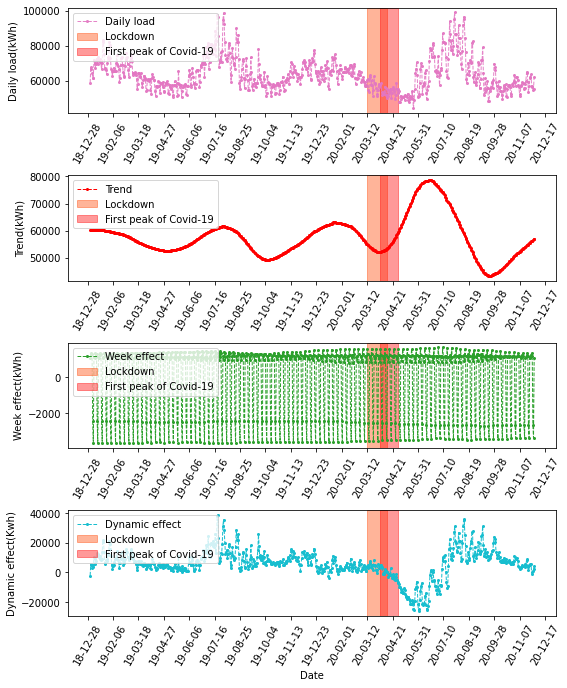

In [10]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,10)
ax = fig.add_subplot(4, 1, 1)
ax.plot(df['date'], df['total_load'], lw=1, label="Daily load", c=c7,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(4, 1, 2)
ax.plot(df['date'], df['LocalLinearTrend'], lw=1, label="Trend", c='red',alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Trend(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(4, 1, 3)
ax.plot(df['date'], df['Weekly'], lw=1, label="Week effect", c=c3,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Week effect(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(4, 1, 4)
ax.plot(df['date'], df['Dynamic'], lw=1, label="Dynamic effect", c=c10,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Dynamic effect(Kwh)")
ax.set_xlabel("Date")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

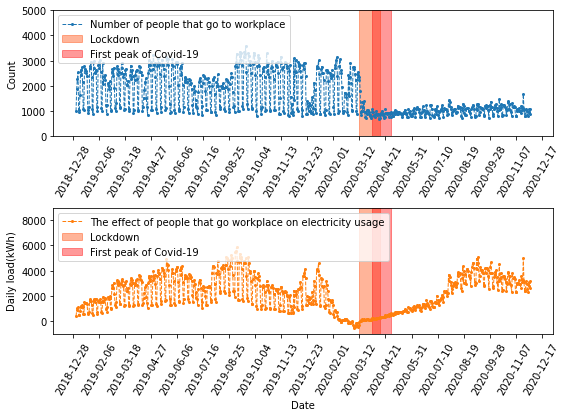

In [11]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['full_time_work_behavior_devices'], lw=1, label="Number of people that go to workplace", c=c1,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([0, 5000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['full_time_coefficients']*df['full_time_work_behavior_devices'], lw=1, label="The effect of people that go workplace on electricity usage", c=c2,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
ax.set_xlabel("Date")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-1000, 9000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

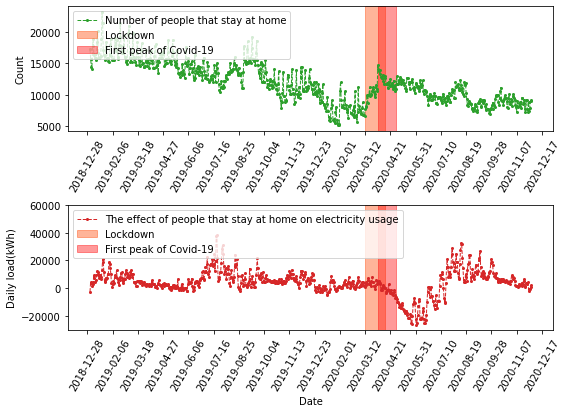

In [12]:
#colors = sns.color_palette()
#c1, c2, c3, c4, c5, c6 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['completely_home_device_count'], lw=1, label="Number of people that stay at home", c=c3,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['completely_home_device_count']*df['completely_coefficients'], lw=1, label="The effect of people that stay at home on electricity usage", c=c4,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
ax.set_xlabel("Date")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-30000, 60000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

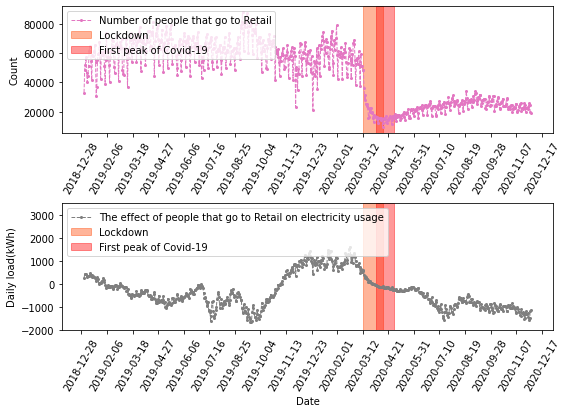

In [13]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Retail'], lw=1, label="Number of people that go to Retail", c=c7,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Retail']*df['Retail_coefficients'], lw=1, label="The effect of people that go to Retail on electricity usage", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-12', '2020-04-12', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-04-01', '2020-04-30', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
ax.set_xlabel("Date")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-2000, 3500])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()